<a href="https://colab.research.google.com/github/haishesauke/ignitus/blob/main/hospital.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [207]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Problem Statement:

The recent COVID-19 pandemic has highlighted the urgent need for more effective healthcare management. One key aspect is predicting the length of a patient's stay in a hospital, known as Length of Stay (LOS). Accurate LOS prediction is vital for identifying patients who are likely to have longer hospital stays upon admission. With this information, hospitals can optimize treatment plans, minimize LOS, reduce the risk of infections, and improve logistical planning, such as room and bed allocation.

Suppose you've been appointed as a Data Scientist at HealthMan, a non-profit organization dedicated to enhancing hospital operations. Your task is to build a model that accurately predicts the Length of Stay for individual patients. The model should categorize LOS into 11 classes, ranging from 0-10 days to more than 100 days.

Your work will have a significant impact on helping hospitals allocate resources efficiently and improve overall healthcare management

In [208]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [209]:
train_df = pd.read_csv('/content/drive/MyDrive/datasets/Healthcare analytics part no 2/train.csv')
train_df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [210]:
columns = ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
           'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness']
for col in columns:
  print( col, train_df[col].nunique())

Hospital_type_code 7
Hospital_region_code 3
Department 5
Ward_Type 6
Ward_Facility_Code 6
Type of Admission 3
Severity of Illness 3


we did this to find the number of unique values present in these categorical columns so that we can convert them into numerical values using **cat-codes** or **one-hot encoding**. Doing so will help us in making the date more suitable for training our machine model.

For converting the categorical values to numerical values, we will use **LabelEncoder** which is part of **sklearn.preprocessing** library and we will use a **for loop** so that we can change the data of different rows in one go.

In [211]:
train_df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [212]:
from sklearn.preprocessing import LabelEncoder

columns = ['Hospital_type_code', 'Hospital_region_code', 'Department', 'Ward_Type',
           'Ward_Facility_Code', 'Type of Admission', 'Severity of Illness']

label_encoder = LabelEncoder()

for col in columns:
    train_df[col] = label_encoder.fit_transform(train_df[col])
    label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

    # Print the column name, label, and code mappings
    print(f"Column: {col}")
    for label, code in label_mapping.items():
        print(f"Label: {label} => Code: {code}")
    print()


Column: Hospital_type_code
Label: a => Code: 0
Label: b => Code: 1
Label: c => Code: 2
Label: d => Code: 3
Label: e => Code: 4
Label: f => Code: 5
Label: g => Code: 6

Column: Hospital_region_code
Label: X => Code: 0
Label: Y => Code: 1
Label: Z => Code: 2

Column: Department
Label: TB & Chest disease => Code: 0
Label: anesthesia => Code: 1
Label: gynecology => Code: 2
Label: radiotherapy => Code: 3
Label: surgery => Code: 4

Column: Ward_Type
Label: P => Code: 0
Label: Q => Code: 1
Label: R => Code: 2
Label: S => Code: 3
Label: T => Code: 4
Label: U => Code: 5

Column: Ward_Facility_Code
Label: A => Code: 0
Label: B => Code: 1
Label: C => Code: 2
Label: D => Code: 3
Label: E => Code: 4
Label: F => Code: 5

Column: Type of Admission
Label: Emergency => Code: 0
Label: Trauma => Code: 1
Label: Urgent => Code: 2

Column: Severity of Illness
Label: Extreme => Code: 0
Label: Minor => Code: 1
Label: Moderate => Code: 2



In [213]:
train_df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,0,2,51-60,4911.0,0-10
1,2,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,0,2,51-60,5954.0,41-50
2,3,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,0,2,51-60,4745.0,31-40
3,4,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,0,2,51-60,7272.0,41-50
4,5,26,1,2,1,2,3,3,3,2.0,31397,7.0,1,0,2,51-60,5558.0,41-50


Now, since all the values are converted to numerical values, we can do some statistical anlysis on the data

for this we will be using a for loop that will traverse throgh the columns one by one each time calculating mean, median and mode of each column.
Then we will make a dataframe containing the results of our statistical analysis.

In [214]:
import statistics
columns = [ 'Hospital_code', 'Hospital_type_code', 'City_Code_Hospital',
       'Hospital_region_code', 'Available Extra Rooms in Hospital',
       'Department', 'Ward_Type', 'Ward_Facility_Code', 'Bed Grade',
        'City_Code_Patient', 'Type of Admission',
       'Severity of Illness', 'Visitors with Patient',
       'Admission_Deposit']
stats = []
for col in columns:
    mean = round(train_df[col].mean(), 2)
    median = train_df[col].median()

    # Calculate the mode
    try:
        mode = statistics.mode(train_df[col])
    except statistics.StatisticsError:
        mode = "No unique mode"


    stat = {
          'Column': col,
          'Mean': mean,
          'Median': median,
          'Mode': mode
      }
    stats.append(stat)
stat_df = pd.DataFrame(stats)
print(stat_df)

                               Column     Mean  Median    Mode
0                       Hospital_code    18.32    19.0    26.0
1                  Hospital_type_code     1.26     1.0     0.0
2                  City_Code_Hospital     4.77     5.0     1.0
3                Hospital_region_code     0.78     1.0     0.0
4   Available Extra Rooms in Hospital     3.20     3.0     2.0
5                          Department     1.94     2.0     2.0
6                           Ward_Type     1.89     2.0     2.0
7                  Ward_Facility_Code     3.29     4.0     5.0
8                           Bed Grade     2.63     3.0     2.0
9                   City_Code_Patient     7.25     8.0     8.0
10                  Type of Admission     0.78     1.0     1.0
11                Severity of Illness     1.37     2.0     2.0
12              Visitors with Patient     3.28     3.0     2.0
13                  Admission_Deposit  4880.75  4741.0  4469.0


# Important Insights:
1. There is a significant variation in the number of available extra rooms across hospitals. This suggests that there may be a need for better bed management practices in some hospitals.
The majority of patients are from city code 8. This suggests that there may be a need for more healthcare resources in this city.
2. The most common type of admission is code 1. This suggests that the majority of patients are admitted through the emergency department.
3. The average admission deposit is 4880.75. This suggests that the cost of hospitalization is a significant burden for many patients.

In [215]:
train_df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,2,3,2,3,3,2,5,2.0,31397,7.0,0,0,2,51-60,4911.0,0-10
1,2,2,2,5,2,2,3,3,5,2.0,31397,7.0,1,0,2,51-60,5954.0,41-50
2,3,10,4,1,0,2,1,3,4,2.0,31397,7.0,1,0,2,51-60,4745.0,31-40
3,4,26,1,2,1,2,3,2,3,2.0,31397,7.0,1,0,2,51-60,7272.0,41-50
4,5,26,1,2,1,2,3,3,3,2.0,31397,7.0,1,0,2,51-60,5558.0,41-50


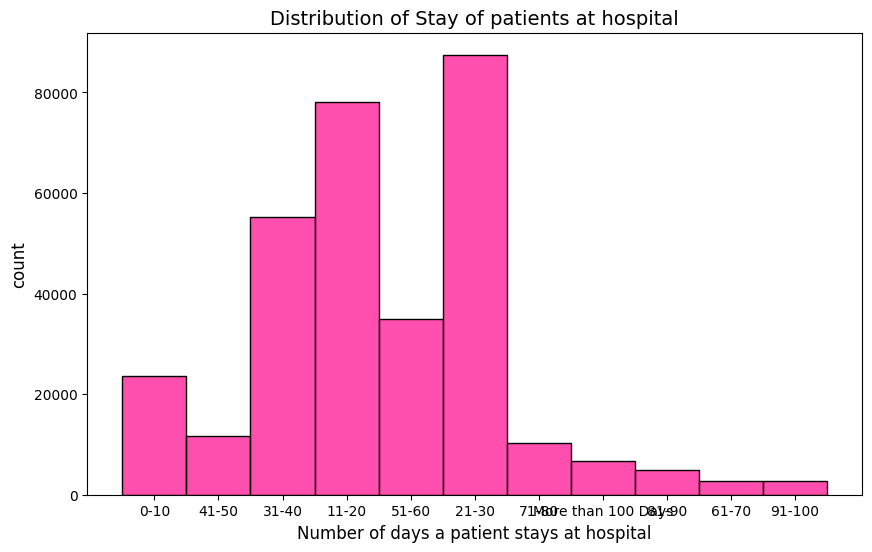

In [216]:
plt.figure(figsize=(10,6))
sns.histplot(data = train_df, x = 'Stay',bins = 20, color = 'deeppink')
plt.title("Distribution of Stay of patients at hospital", fontsize = 14)
plt.xlabel('Number of days a patient stays at hospital', fontsize = 12)
plt.ylabel('count', fontsize = 12)
plt.show()

<h3>Age Sidtribution of Patients</h3>
now we will use a graph to draw insights on the age of patients in our data.
For this we will use **histplot** from **seaborn** which helps us build a graph.

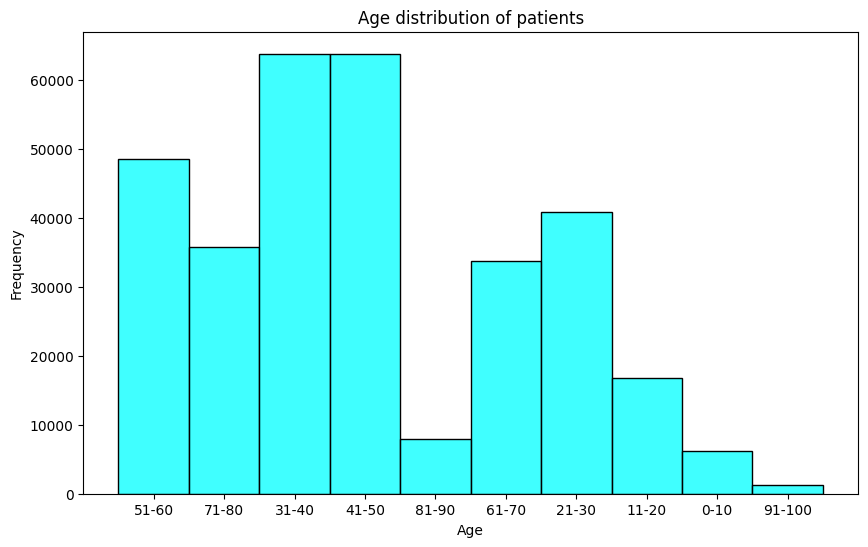

In [217]:
plt.figure(figsize=(10, 6))
sns.histplot(data = train_df, x = 'Age', color = 'aqua' )
plt.title('Age distribution of patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

<h3>Insights from the age distribution of patients graph :</h3>

1. The majority of patients are in the 31-60 year age group (54%).
2. There is a significant decline in the number of patients in the 61-70 and 71-80 age groups.
3. The number of patients in the 81-90 and 91-100 age groups is very small.

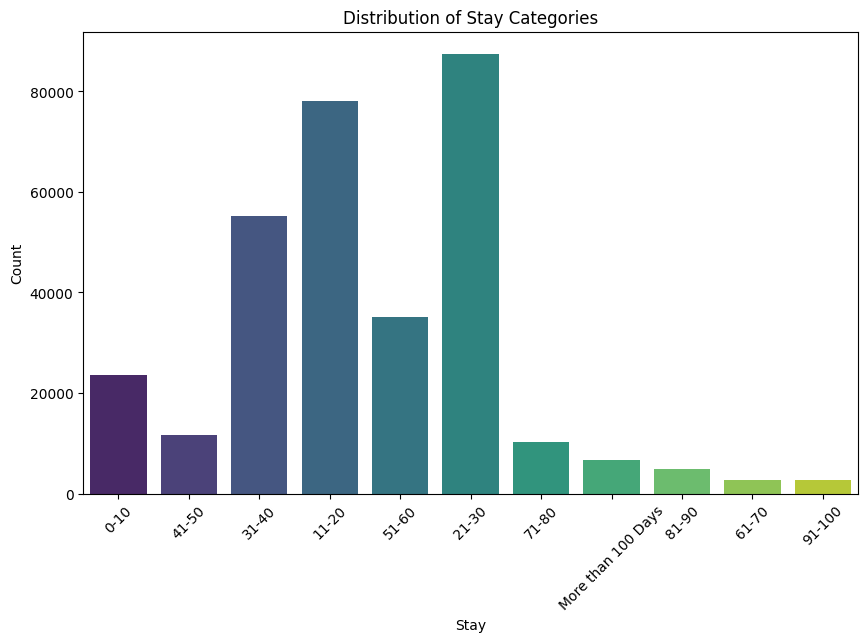

In [218]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Stay', palette='viridis')
plt.title('Distribution of Stay Categories')
plt.xlabel('Stay')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

The graph shows that the majority of patients (70%) are discharged within 30 days of admission. This suggests that the hospital is able to efficiently treat and discharge most patients.
However, a significant number of patients (30%) remain hospitalized for more than 30 days. This may be due to a number of factors, such as the severity of their illness or injury, the need for specialized care, or the lack of access to long-term care facilities.

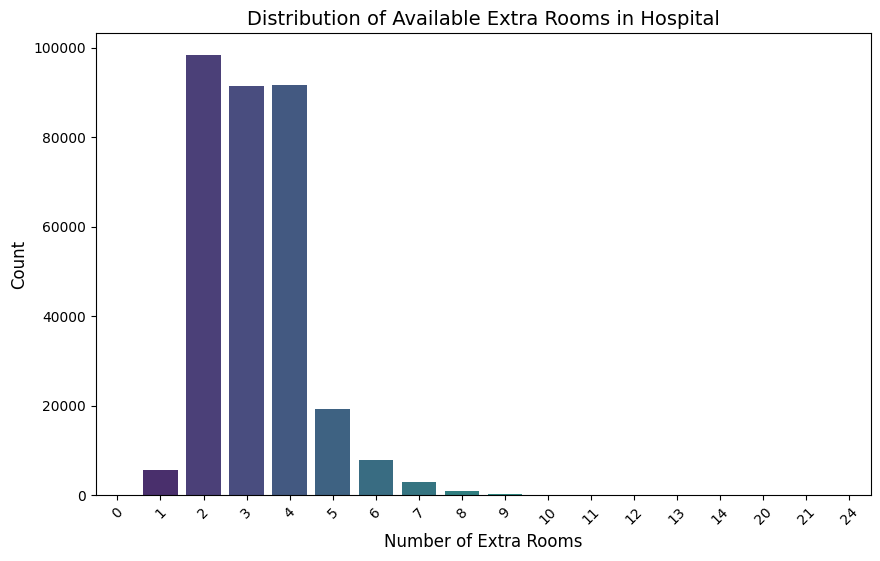

In [219]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Available Extra Rooms in Hospital', palette='viridis')
plt.title('Distribution of Available Extra Rooms in Hospital', fontsize = 14)
plt.xlabel('Number of Extra Rooms', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

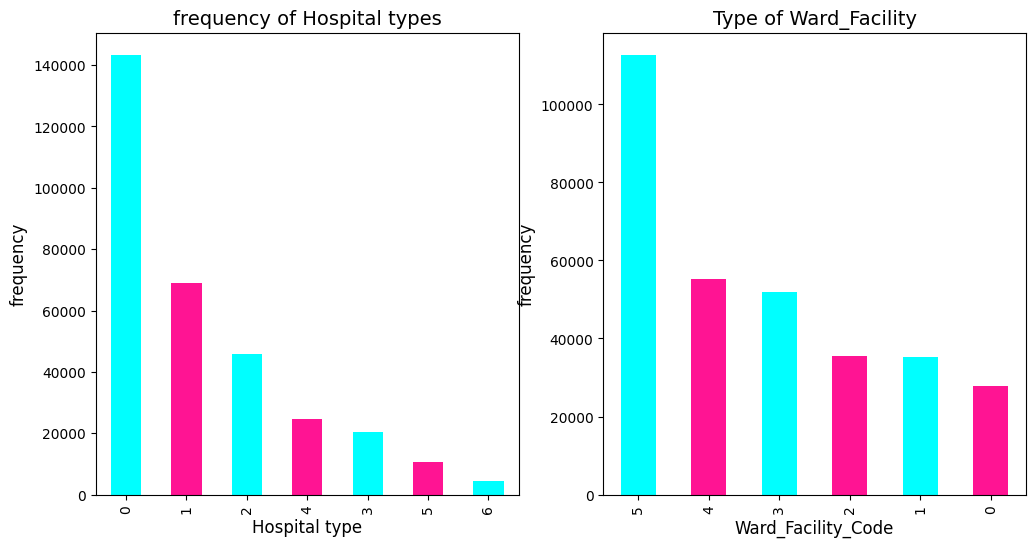

In [220]:
plt.figure(figsize=(12,6))
ax = plt.subplot(1,2,1)
freq1 = train_df['Hospital_type_code'].value_counts()
ax = freq1.plot(kind = 'bar' , color = ['aqua' , 'deeppink'])
plt.title('frequency of Hospital types', fontsize = 14)
plt.xlabel('Hospital type', fontsize = 12)
plt.ylabel('frequency', fontsize = 12)

ax = plt.subplot(1,2,2)
freq2 = train_df['Ward_Facility_Code'].value_counts()
ax = freq2.plot(kind = 'bar' , color = ['aqua' , 'deeppink'])
plt.title('Type of Ward_Facility', fontsize = 14)
plt.xlabel('Ward_Facility_Code', fontsize = 12)
plt.ylabel('frequency', fontsize =12)
plt.show()

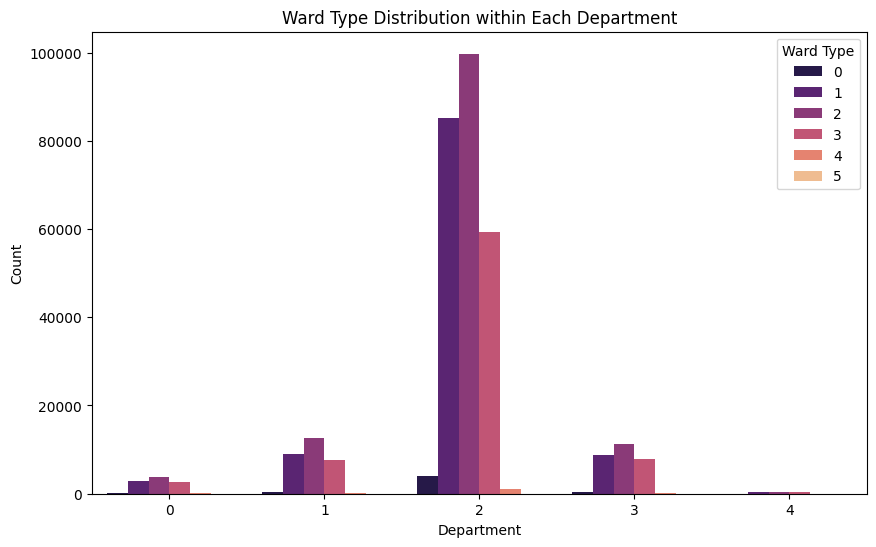

Chi-squared statistic: 583.10
p-value: 0.0000
There is a significant association between Ward Type and Department.


In [221]:
from scipy.stats import chi2_contingency
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Department', hue='Ward_Type', palette='magma')
plt.title('Ward Type Distribution within Each Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Ward Type', loc='upper right')
plt.show()

# Perform the chi-squared test
contingency_table = pd.crosstab(train_df['Department'], train_df['Ward_Type'])

chi2, p, _, _ = chi2_contingency(contingency_table)
print(f'Chi-squared statistic: {chi2:.2f}')
print(f'p-value: {p:.4f}')

# Interpret the results
alpha = 0.05  # Set the significance level
if p < alpha:
    print('There is a significant association between Ward Type and Department.')
else:
    print('There is no significant association between Ward Type and Department.')


The chi-squared test is a statistical test that is used to test for an association between two categorical variables. In this case, the two categorical variables are Ward Type and Department.

The chi-squared statistic is 583.10 with a p-value of 0.0000. This means that there is a statistically significant association between Ward Type and Department

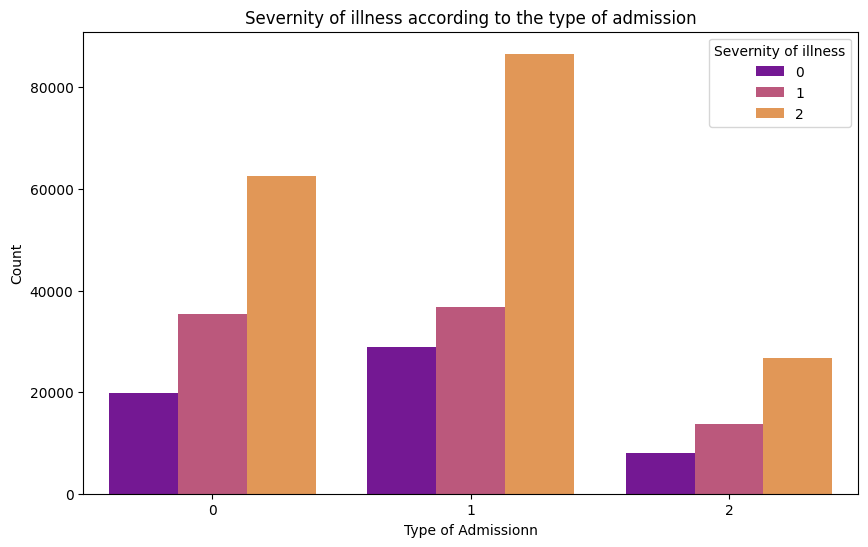

In [222]:
plt.figure(figsize=(10, 6))
sns.countplot(data=train_df, x='Type of Admission', hue='Severity of Illness', palette='plasma')
plt.title('Severnity of illness according to the type of admission')
plt.xlabel('Type of Admissionn')
plt.ylabel('Count')
plt.legend(title='Severnity of illness', loc='upper right')
plt.show()

The graph shows the severity of illness according to the type of admission. Emergency admissions are the most common type of admission, but they are also the least severe. Trauma admissions are the least common type of admission, but they are also the most severe. Urgent admissions are somewhere in between.

One possible explanation for this pattern is that emergency admissions are often for conditions that are not immediately life-threatening, such as colds and the flu. Trauma admissions, on the other hand, are often for life-threatening injuries, such as car accidents and gunshot wounds. Urgent admissions are typically for conditions that are not immediately life-threatening, but that require prompt medical attention, such as appendicitis and pneumonia.

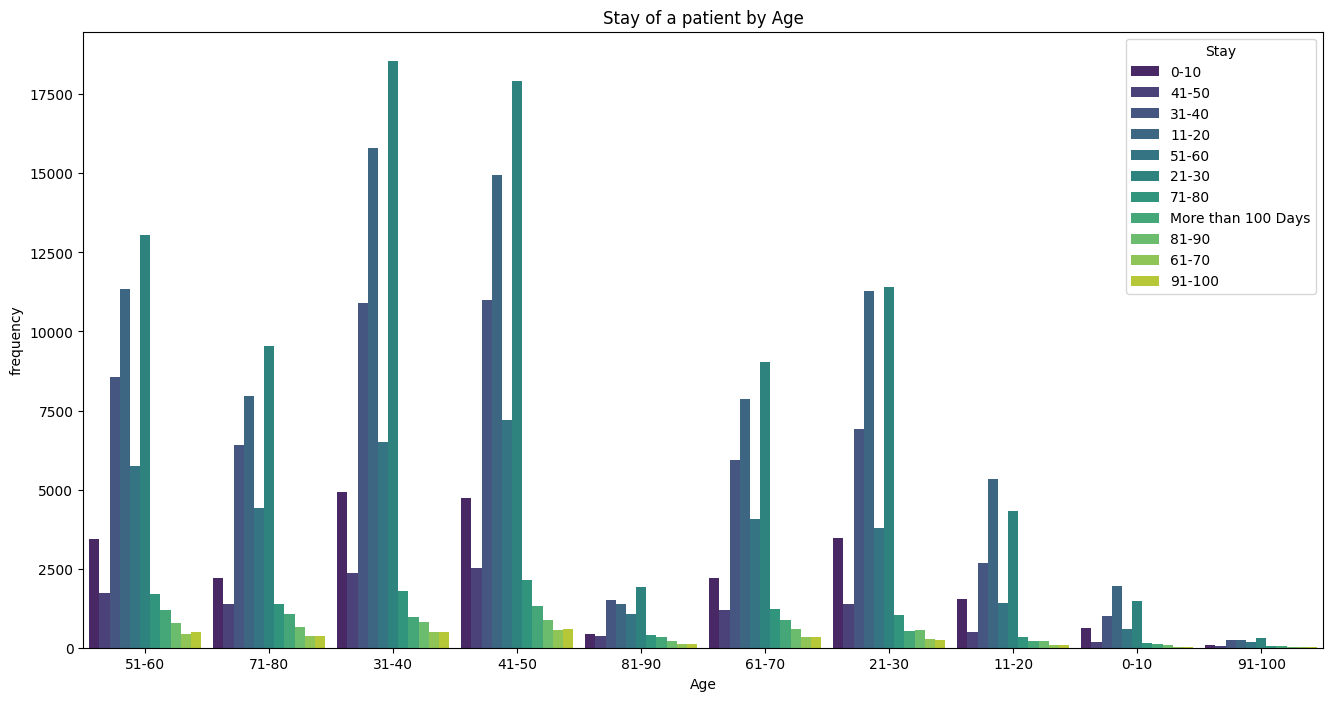

Chi-squared statistic: 3652.89
P-value: 0.0
Degrees of freedom: 90
there is a significant association between Stay and Age
Patient's stay at hospital is not independant of his/her Age


In [223]:

plt.figure(figsize = (16,8))
sns.countplot(data = train_df, x = 'Age', hue = 'Stay',width = 0.9, palette='viridis')
plt.title('Stay of a patient by Age')
plt.xlabel('Age')
plt.ylabel('frequency')
plt.show()

from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(train_df['Stay'], train_df['Age'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Chi-squared statistic:", round(chi2, 3))
print("P-value:", round(p_value, 3))
print("Degrees of freedom:", dof)
if p_value < 0.05:
  print("there is a significant association between Stay and Age\nPatient's stay at hospital is not independant of his/her Age")

 The Chi-squared test results indicate that there is a significant association between the "Stay" and "Age" variables. This suggests that the length of stay ("Stay") is not independent of the patient's age ("Age"). The low p-value indicates that the association is not due to random chance, and the Chi-squared statistic shows the strength of this association.

<ipython-input-224-6e566a746a9d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=train_df.corr()


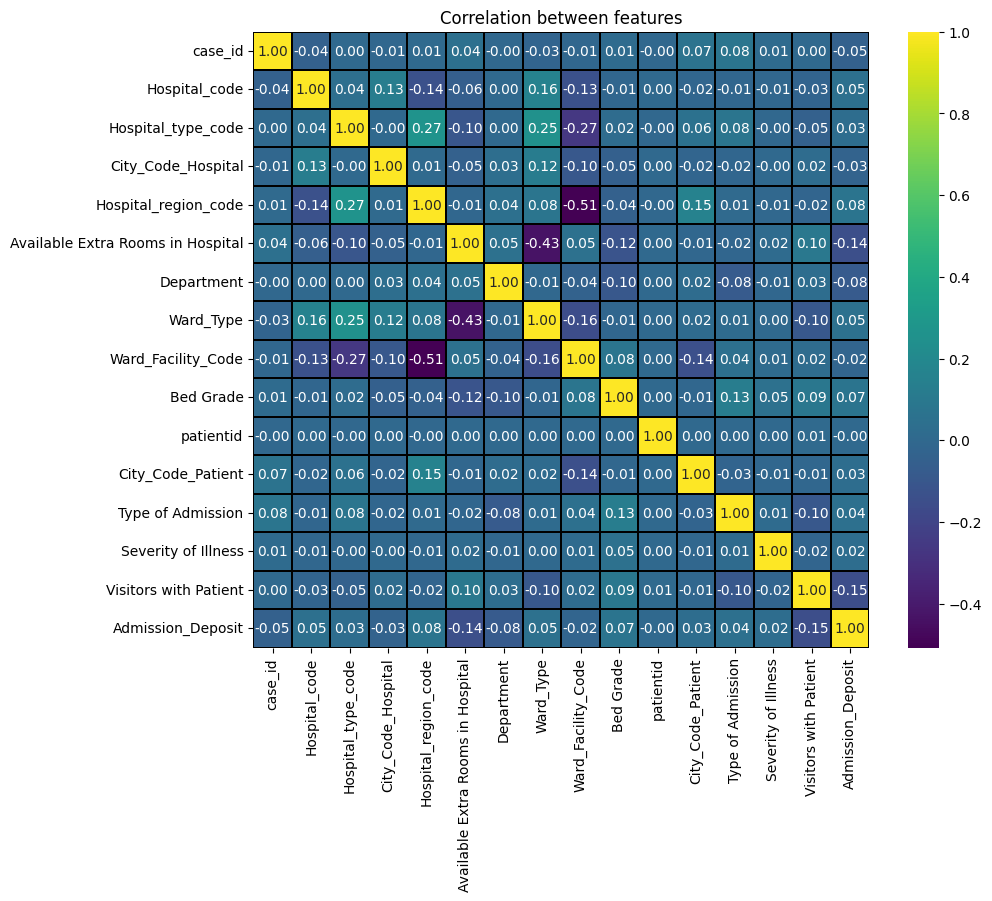

In [224]:
corr=train_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, linewidths=0.02, square=True,annot=True,cmap='viridis',linecolor="black", fmt=".2f")
plt.title('Correlation between features')
plt.show()

In [225]:
remove_columns = ['case_id', 'patientid', 'Admission_Deposit', 'Visitors with Patient', 'Hospital_region_code',
                  'City_Code_Hospital', 'Ward_Facility_Code', 'City_Code_Patient', 'Hospital_code', 'Bed Grade']
train_df = train_df.drop(remove_columns, axis = 1)

In [226]:
train_df.head()

,Hospital_type_code,Available Extra Rooms in Hospital,Department,Ward_Type,Type of Admission,Severity of Illness,Age,Stay
0,2,3,3,2,0,0,51-60,0-10
1,2,2,3,3,1,0,51-60,41-50
2,4,2,1,3,1,0,51-60,31-40
3,1,2,3,2,1,0,51-60,41-50
4,1,2,3,3,1,0,51-60,41-50


Now, we can see that the age and stay are categorical values while all other columns have numerical data, this can become a problem while making a machine model.
So now we will replace the values of these columns with the middle values so that it doesnot cause any problem in future.
By doing this we will also be able to compare the relation of Stay of a patient with other columns of our dataset.

In [227]:
train_df['Age'] = train_df['Age'].str.split('-').apply(lambda x: (int(x[0]) + int(x[1])) / 2)
train_df['Age'] = train_df['Age'].astype(int)

In [228]:
def convert_stay_to_numerical(stay):
    if stay == 'More than 100 Days':
        return 101  # Set it to a value greater than 100
    else:
        # Split the string, take the two numbers, and calculate the middle value
        start, end = map(int, stay.split('-'))
        return (start + end) // 2

# Apply the custom function to the 'Stay' column
train_df['Stay'] = train_df['Stay'].apply(convert_stay_to_numerical)


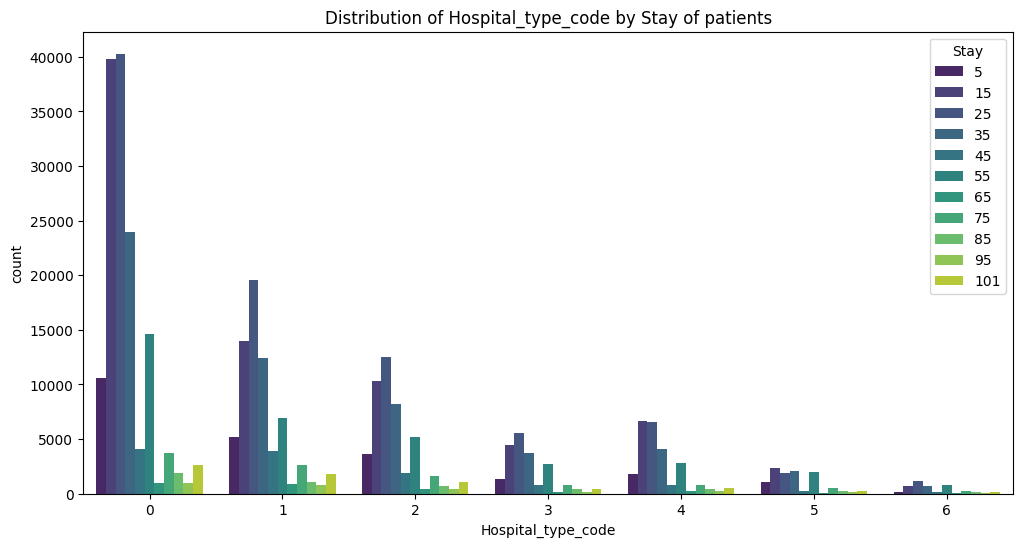

Chi-squared statistic: 5540.64
P-value: 0.0
Degrees of freedom: 60
there is a significant association between Stay and Hospital_type_code



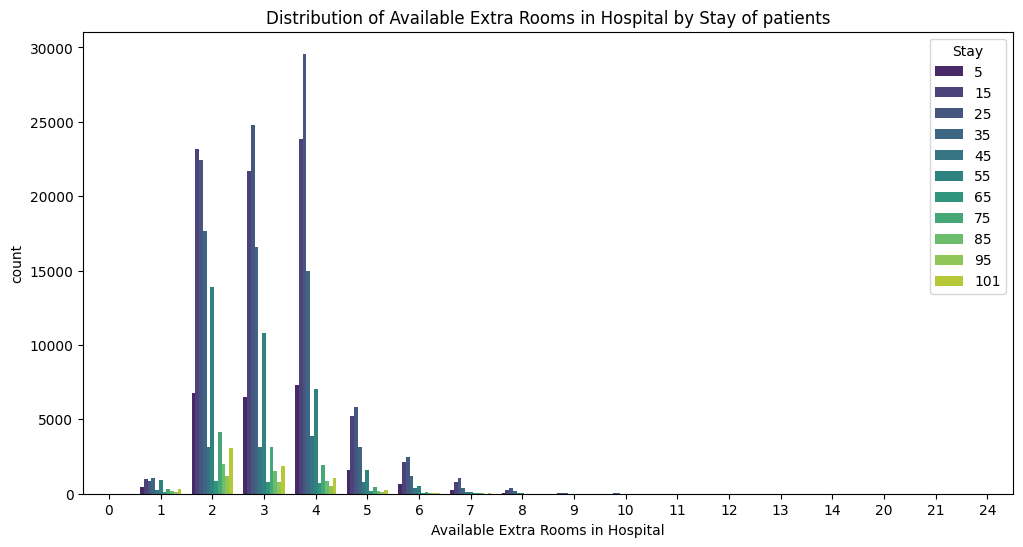

Chi-squared statistic: 9007.652
P-value: 0.0
Degrees of freedom: 170
there is a significant association between Stay and Available Extra Rooms in Hospital



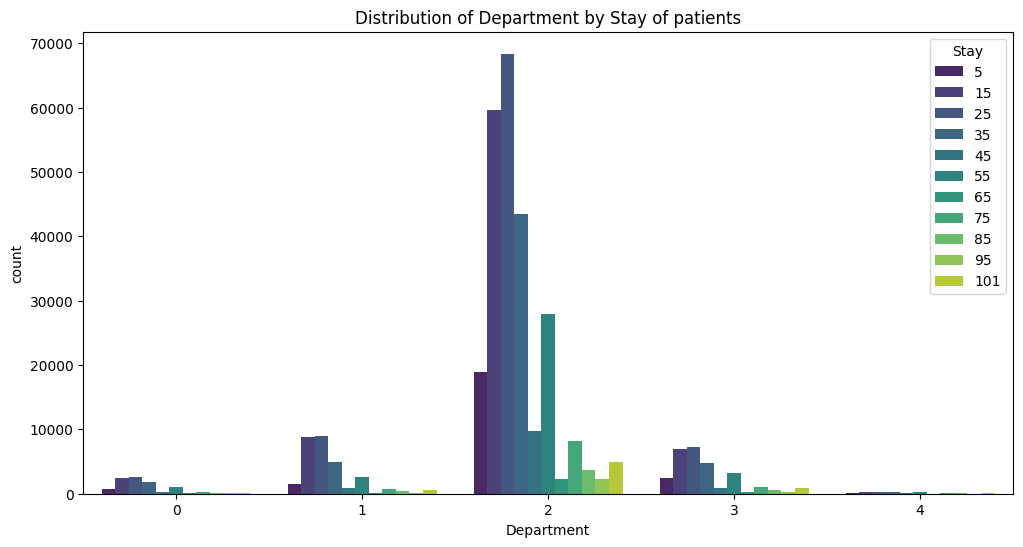

Chi-squared statistic: 1618.923
P-value: 0.0
Degrees of freedom: 40
there is a significant association between Stay and Department



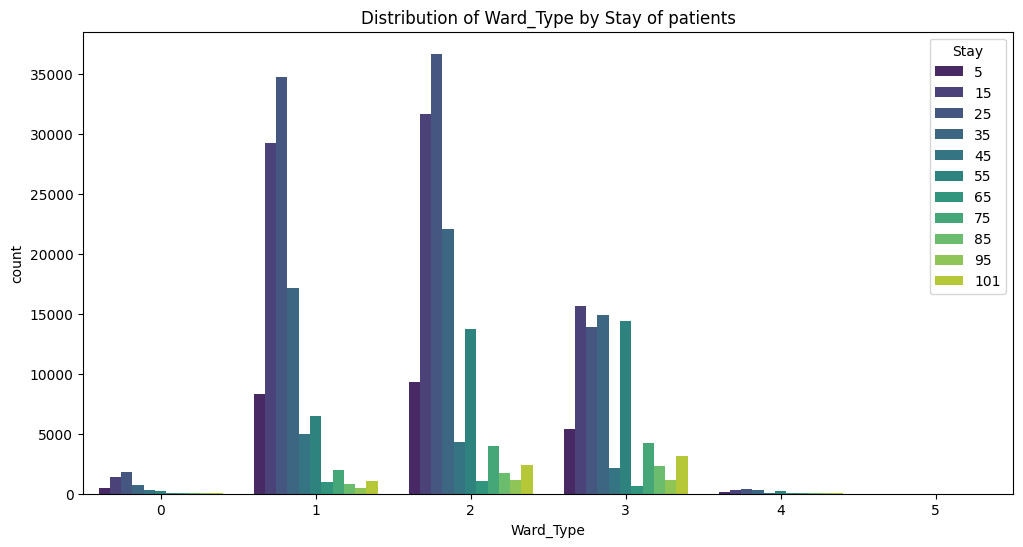

Chi-squared statistic: 18451.433
P-value: 0.0
Degrees of freedom: 50
there is a significant association between Stay and Ward_Type



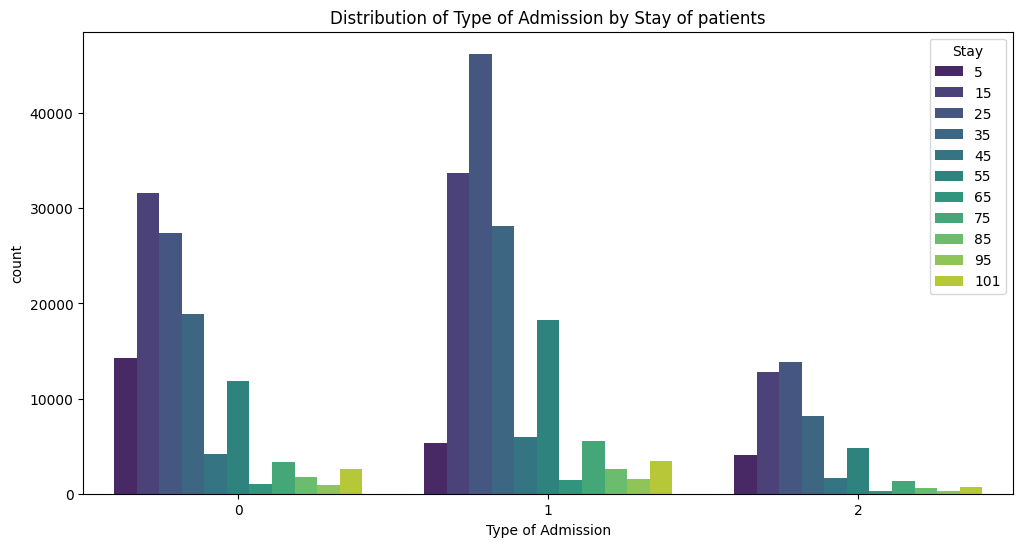

Chi-squared statistic: 9632.544
P-value: 0.0
Degrees of freedom: 20
there is a significant association between Stay and Type of Admission



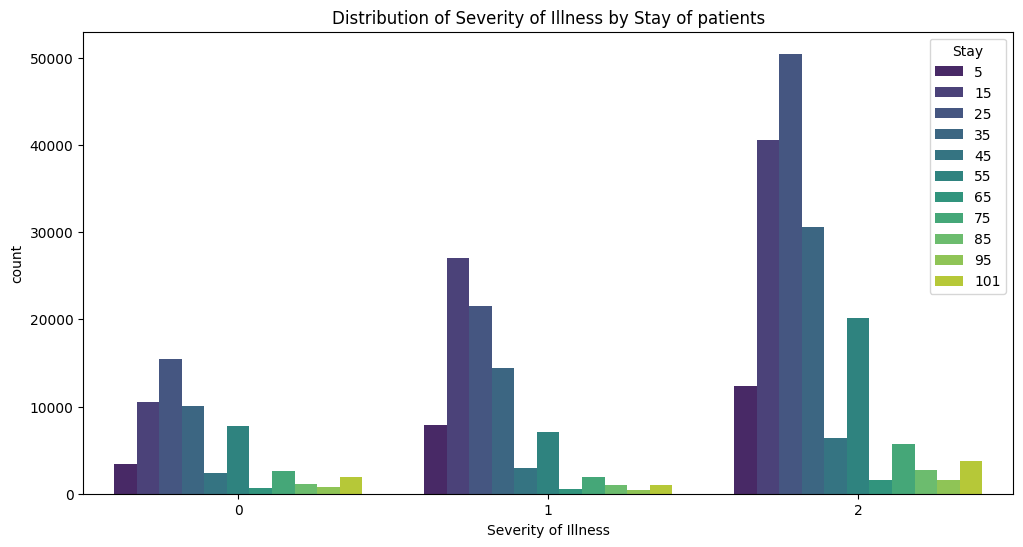

Chi-squared statistic: 6616.482
P-value: 0.0
Degrees of freedom: 20
there is a significant association between Stay and Severity of Illness



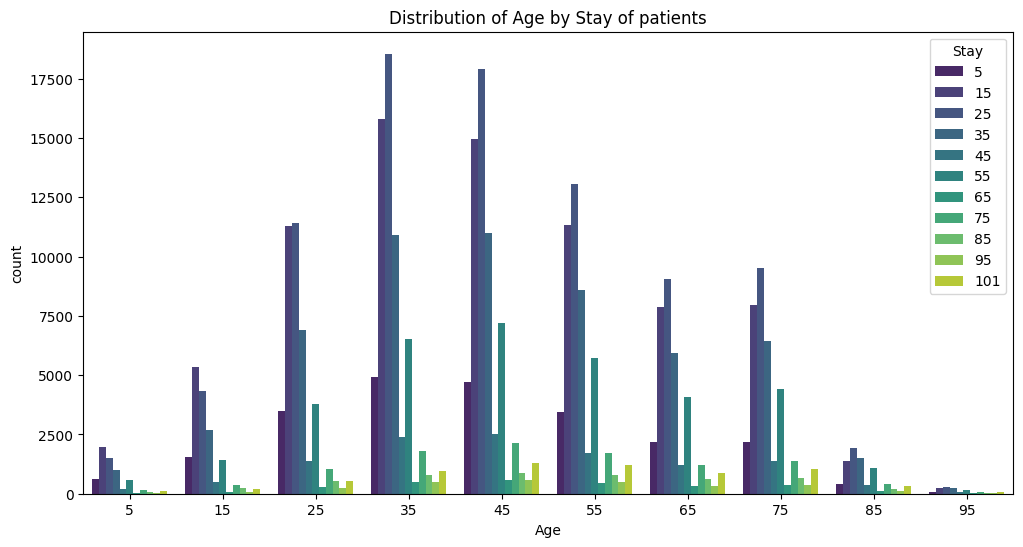

Chi-squared statistic: 3652.89
P-value: 0.0
Degrees of freedom: 90
there is a significant association between Stay and Age



In [229]:
columns = ['Hospital_type_code', 'Available Extra Rooms in Hospital', 'Department',
       'Ward_Type', 'Type of Admission', 'Severity of Illness', 'Age']

for col in columns:
  plt.figure(figsize=(12,6))
  sns.countplot(data = train_df, x = col, hue = 'Stay', palette = 'viridis')
  plt.title(f"Distribution of {col} by Stay of patients")
  plt.xlabel(col)
  plt.ylabel('count')
  plt.show()

  contingency_table = pd.crosstab(train_df[col] ,train_df['Stay'] )
  chi2, p_value, dof, expected = chi2_contingency(contingency_table)

  print("Chi-squared statistic:", round(chi2, 3))
  print("P-value:", p_value)
  print("Degrees of freedom:", dof)
  if p_value < 0.05:
    print(f"there is a significant association between Stay and {col}\n")


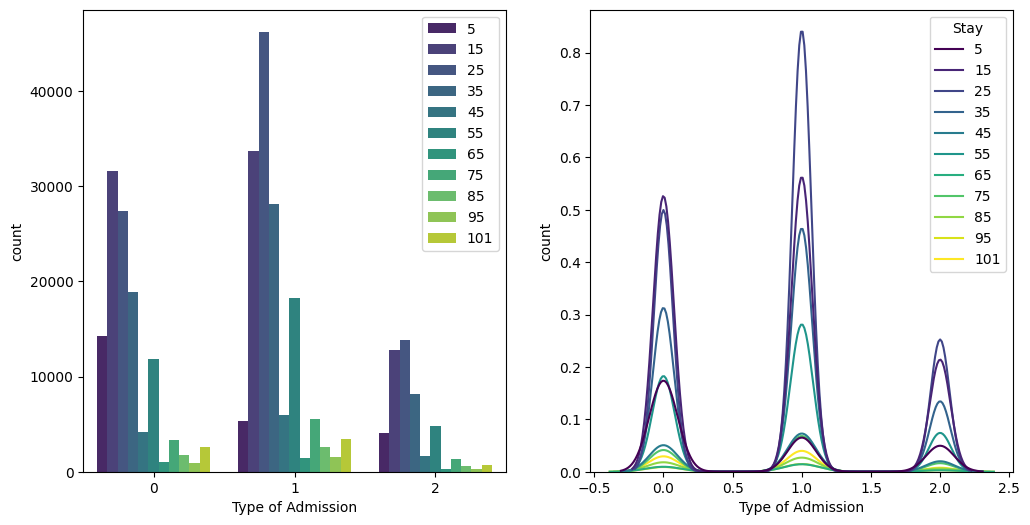

In [230]:
plt.figure(figsize=(12,6))
ax = plt.subplot(1,2,1)
ax=sns.countplot(data = train_df, x ='Type of Admission',hue = 'Stay',
              palette = 'viridis', )
plt.xlabel('Type of Admission')
plt.ylabel('count')
plt.legend()

ax =plt.subplot(1,2,2)
ax=sns.kdeplot(data = train_df, x ='Type of Admission',hue = 'Stay',
              palette = 'viridis', )
plt.xlabel('Type of Admission')
plt.ylabel('count')
plt.show()

In [231]:
train_df.columns

Index(['Hospital_type_code', 'Available Extra Rooms in Hospital', 'Department',
       'Ward_Type', 'Type of Admission', 'Severity of Illness', 'Age', 'Stay'],
      dtype='object')

#Machine Models

<h3>Linear Regression Model</h3>

In [232]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error , r2_score, accuracy_score

In [233]:
X = train_df[['Hospital_type_code', 'Available Extra Rooms in Hospital', 'Department',
       'Ward_Type', 'Type of Admission', 'Severity of Illness', 'Age']]
y = train_df['Stay']

In [234]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [235]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)


In [236]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared error : {mse: .2f}')
print(f"R-squared: {r2: .2f}")


Mean Squared error :  424.62
R-squared:  0.05


-- An MSE of 424.62 suggests that the model's
predictions have a moderate level of error, but it's crucial to understand the context and units of the problem to determine if this level of error is acceptable.

-- An R² of 0.05 indicates that the linear regression model is not a good fit for the data. It explains only a small portion of the variance, suggesting that there are likely other factors influencing the target variable that the model does not account for.


<h3>Decision Tree</h3>

In [237]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared error : {mse: .2f}')
print(f"R-squared: {r2: .2f}")

Mean Squared error :  439.16
R-squared:  0.01


1. Low Predictive Power: The R-squared value of 0.01 indicates that the model explains only 1% of the variance in the target variable. In other words, the model has very low predictive power and does not capture much of the variability in the data. This suggests that the model may not be an effective predictor for the given dataset.

2. High Prediction Error: The high MSE of 439.59 indicates that the model's predictions deviate significantly from the actual values. The squared errors between predicted and actual values are relatively large, which means that the model's predictions are not accurate.

<h3>Random Forest model</h3>

In [238]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train , y_train)
y_pred = random_forest.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared error : {mse: .2f}')
print(f"R-squared: {r2: .2f}")

Mean Squared error :  424.63
R-squared:  0.05
